<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_4_Clasificaci%C3%B3n_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sesión 4: Modelo Churn**



<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

#**Predicción del Churn**

**ANÁLISIS DE CHURN DE CLIENTES PARA UNA EMPRESA DE TELECOMUNICACIONES**


In [ ]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importamos la data
url = 'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/Data_Customer_Churn.csv'
data = pd.read_csv(url,encoding='latin1')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

**Análisis descriptivo de Churn**


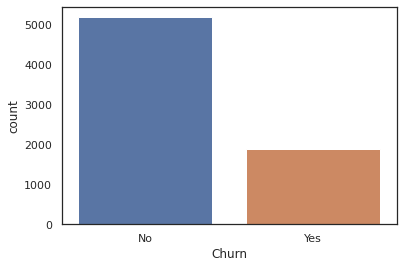

In [ ]:
sns.set(style="white", palette="deep", color_codes=True)
sns.despine(left=True)
sns.countplot(data["Churn"]);

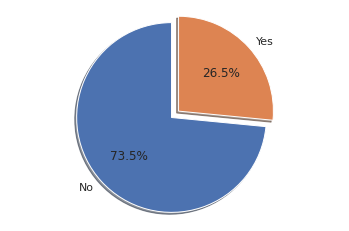

In [ ]:
plt.pie(data["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=data["Churn"].unique())
plt.axis('equal') ;

El 26.5% de mis clientes dejaron de serlo.

**Limpieza de data**


In [ ]:
data['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [ ]:
data.query("TotalCharges == ' '").TotalCharges.count()

11

In [ ]:
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)
data.dropna(inplace = True);

In [ ]:
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
data[data["TotalCharges"]<0]["TotalCharges"].count()

0

In [ ]:
temp_columns = [col for col in data.columns if col not in ("customerID","gender","MonthlyCharges","TotalCharges","Churn")]

In [ ]:
temp_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
for col in temp_columns:
    print("{} : {}".format(col,data[col].unique()))

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
for col in temp_columns:
    if col in ("OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"):
        data[col] = data[col].replace({'No internet service':'No'})

Tiempo de tenencia del producto

In [ ]:
temp_tenure = np.array(data["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


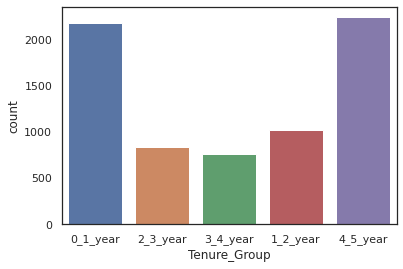

In [ ]:
def tenure_to_group(data):
    if data["tenure"] <=12:
        return "0_1_year"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "1_2_year"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "2_3_year"
    elif (data["tenure"] > 36) & (data["tenure"] <= 48) :
        return "3_4_year"
    elif data["tenure"] > 48 & (data["tenure"] <= 60):
        return "4_5_year"
    elif data["tenure"] > 60 & (data["tenure"] <= 72):
        return "5_6_year"
data["Tenure_Group"] = data.apply(lambda data:tenure_to_group(data),axis = 1)
sns.countplot(data["Tenure_Group"]);

Mayores grupos de clientes con tenencia de menos de 1 año y de 4 a 5 años.


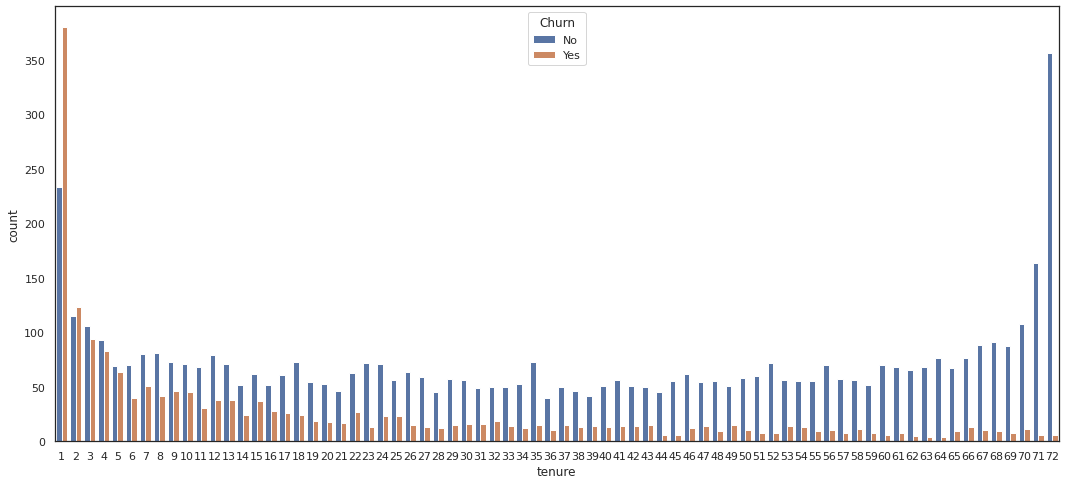

In [ ]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(data["tenure"],hue = data["Churn"]);

Mayor churn se observa en clientes con menor tenencia de productos.

Distribución del churn en otras variables:

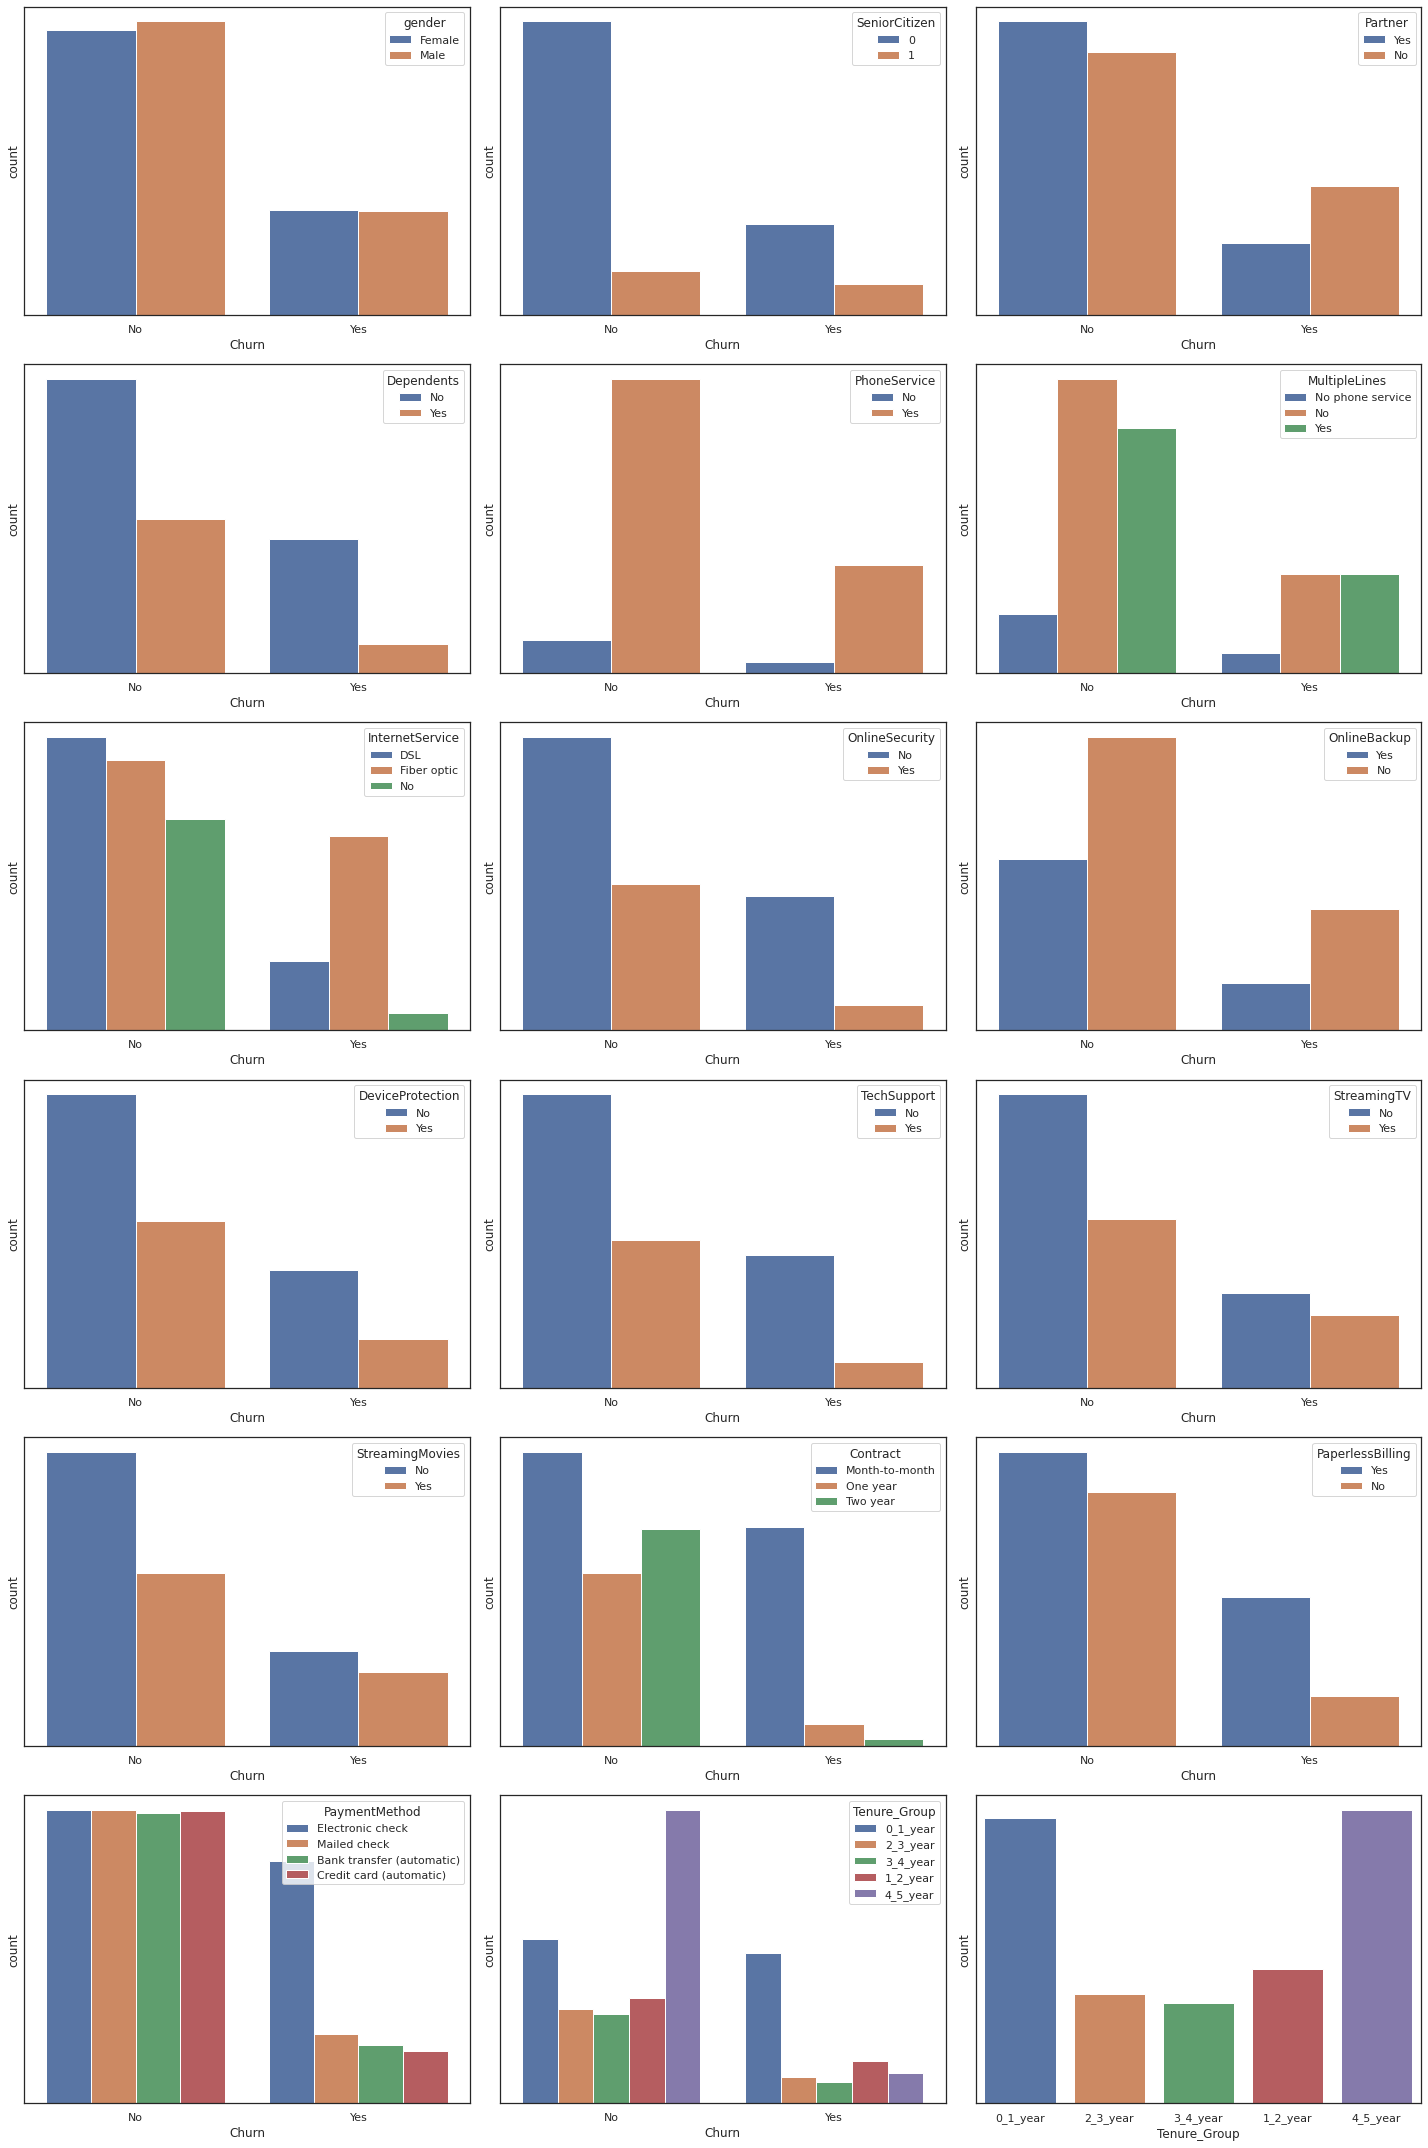

In [ ]:

f, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

sns.countplot(data["Churn"],hue = data["gender"],ax = axes[0,0])
sns.countplot(data["Churn"],hue = data["SeniorCitizen"],ax = axes[0,1])
sns.countplot(data["Churn"],hue = data["Partner"],ax = axes[0,2])
sns.countplot(data["Churn"],hue = data["Dependents"],ax = axes[1,0])
sns.countplot(data["Churn"],hue = data["PhoneService"],ax = axes[1,1])
sns.countplot(data["Churn"],hue = data["MultipleLines"],ax = axes[1,2])
sns.countplot(data["Churn"],hue = data["InternetService"],ax = axes[2,0])
sns.countplot(data["Churn"],hue = data["OnlineSecurity"],ax = axes[2,1])
sns.countplot(data["Churn"],hue = data["OnlineBackup"],ax = axes[2,2])
sns.countplot(data["Churn"],hue = data["DeviceProtection"],ax = axes[3,0])
sns.countplot(data["Churn"],hue = data["TechSupport"],ax = axes[3,1])
sns.countplot(data["Churn"],hue = data["StreamingTV"],ax = axes[3,2])
sns.countplot(data["Churn"],hue = data["StreamingMovies"],ax = axes[4,0])
sns.countplot(data["Churn"],hue = data["Contract"],ax = axes[4,1])
sns.countplot(data["Churn"],hue = data["PaperlessBilling"],ax = axes[4,2])
sns.countplot(data["Churn"],hue = data["PaymentMethod"],ax = axes[5,0])
sns.countplot(data["Churn"],hue = data["Tenure_Group"],ax = axes[5,1])
sns.countplot(data["Tenure_Group"],ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()

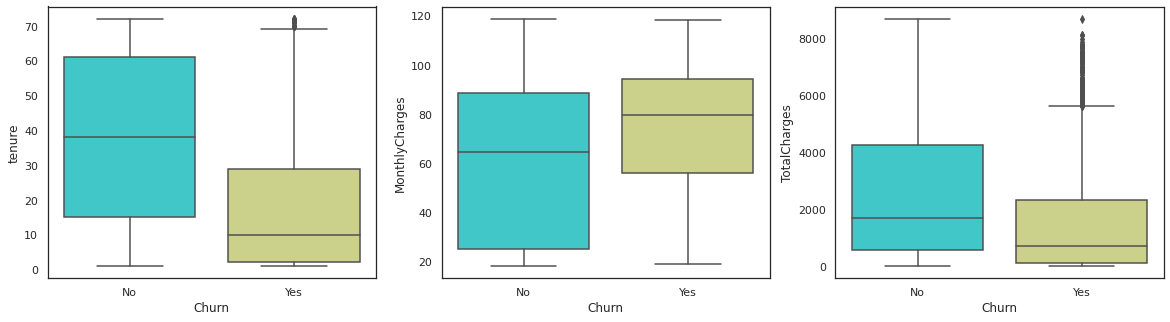

In [ ]:
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=data,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=data,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=data,palette='rainbow',ax = axes[2])

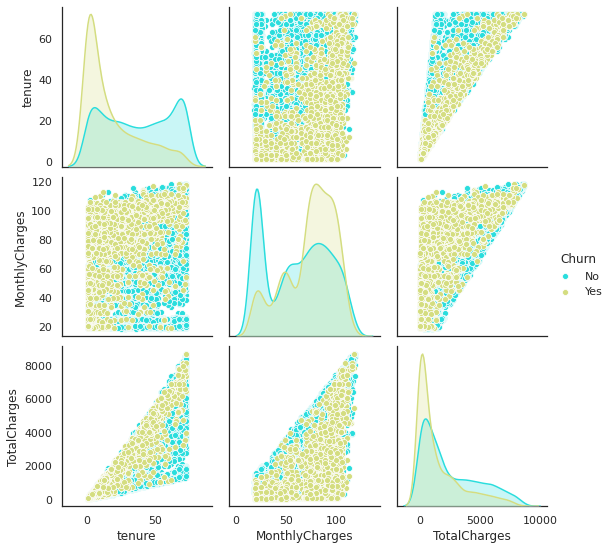

In [ ]:
temp_cols = data.drop("SeniorCitizen",axis = 1)
sns.pairplot(temp_cols,hue='Churn',palette='rainbow')

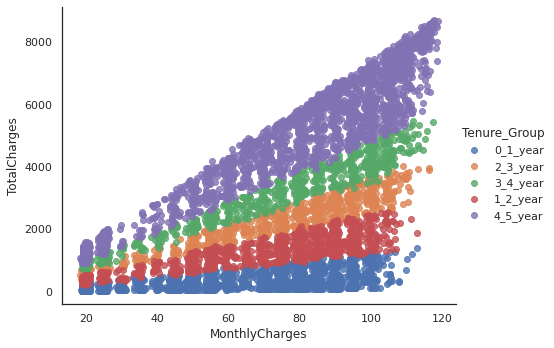

In [ ]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=data,fit_reg = False,hue = "Tenure_Group",aspect=12/9);

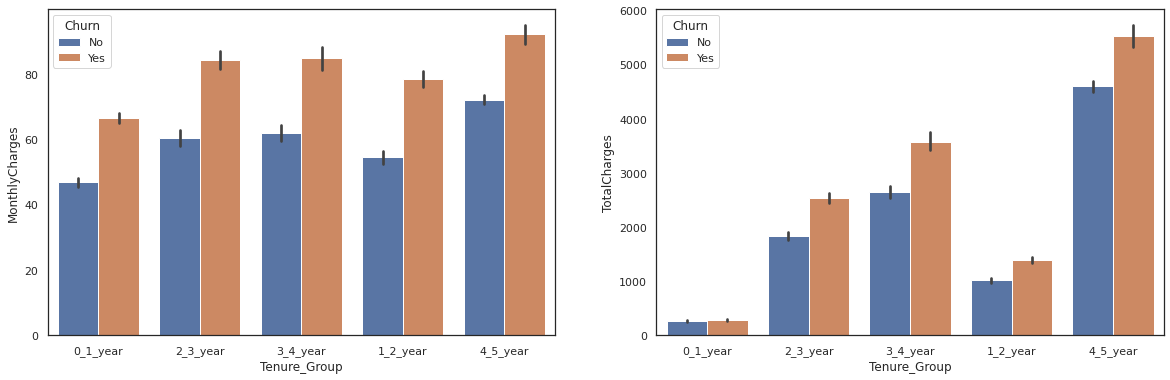

In [ ]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=data,hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=data,hue = "Churn",ax = axes[1])

**Preprocesamiento de datos**

In [ ]:
cat_cols = [x for x in data.columns if data[x].nunique()<6 and x!="Churn"]
num_cols = [x for x in data.columns if data[x].nunique()>6 and x!="customerID"]
id_customer = data["customerID"]
label = data["Churn"]
label = label.apply(lambda x: 1 if x == "Yes" else 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features_log_transformed = pd.DataFrame(data = data[num_cols])
features_log_transformed[num_cols] = data[num_cols].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_cols] = scaler.fit_transform(features_log_transformed[num_cols])

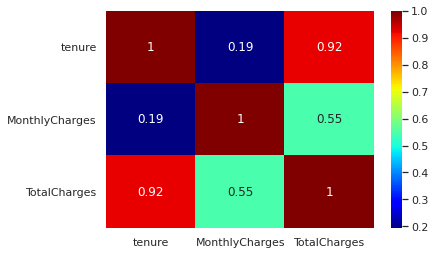

In [ ]:
sns.heatmap(features_log_minmax_transform.corr(),annot=True,cmap='jet');

In [ ]:
features_log_minmax_transform.drop("tenure",inplace = True, axis = 1)

In [ ]:
data.drop(["MonthlyCharges","TotalCharges","tenure"],axis = 1, inplace = True)
data = pd.concat([data, features_log_minmax_transform], axis=1)

In [ ]:
data.drop("Churn",inplace = True, axis = 1)
data.drop("customerID",inplace = True, axis = 1)

Realizamos el proceso de one hot encoding con nuestras variables categóricas:

In [ ]:
data = pd.get_dummies(data = data,columns = cat_cols)

In [ ]:
data.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
0,0.258016,0.072892,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0.602917,0.749358,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,0.572840,0.280590,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0.443484,0.745063,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
4,0.719396,0.335724,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


Creamos una nueva data donde concatenamos la data original con la data que contiene las nuevas variables de one-hot-encoding:

In [ ]:
data_original = pd.concat([data, label,id_customer], axis=1)

In [ ]:
data_original.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year,Churn,customerID
0,0.258016,0.072892,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,7590-VHVEG
1,0.602917,0.749358,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,5575-GNVDE
2,0.572840,0.280590,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,3668-QPYBK
3,0.443484,0.745063,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,7795-CFOCW
4,0.719396,0.335724,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,9237-HQITU


**Evaluación de Algoritmos**

Dividimos nuestra data en un 70% para entrenar el modelo y en un 30% para validar mi modelo

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4922 samples.
Testing set has 2110 samples.


Importamos las librerías de 5 tipos de algoritmos de clasificación:

1. Árboles de decisión
2. Regresión logística
3. SVC (Máquinas de soporte vectorial)
4. XgBoost
5. Random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110

Area under ROC curve :  0.6621988310553988 



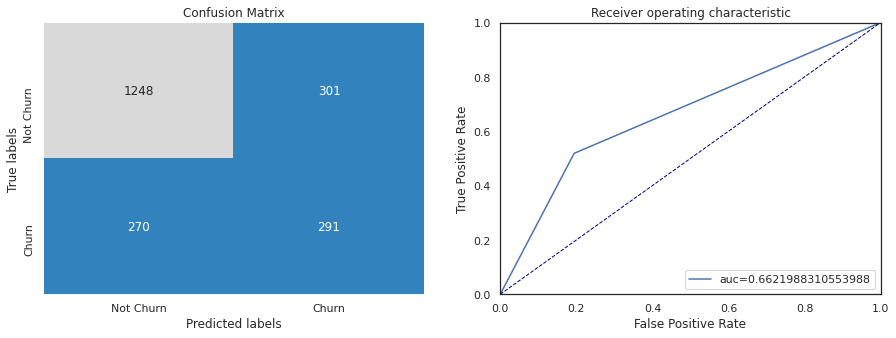

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7090032209843852 



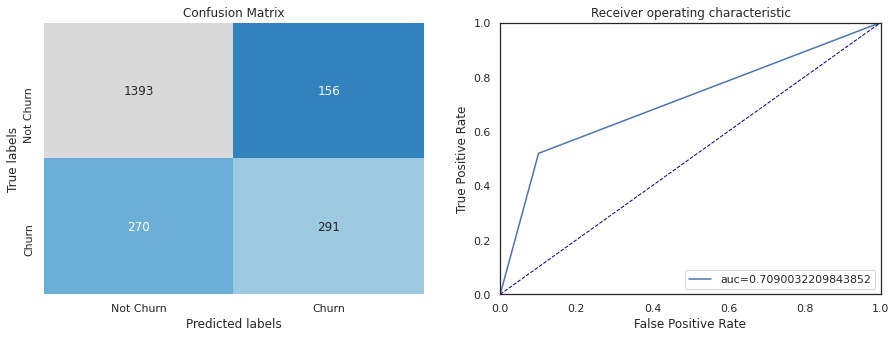

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.44      0.53       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110

Area under ROC curve :  0.6803624671888828 



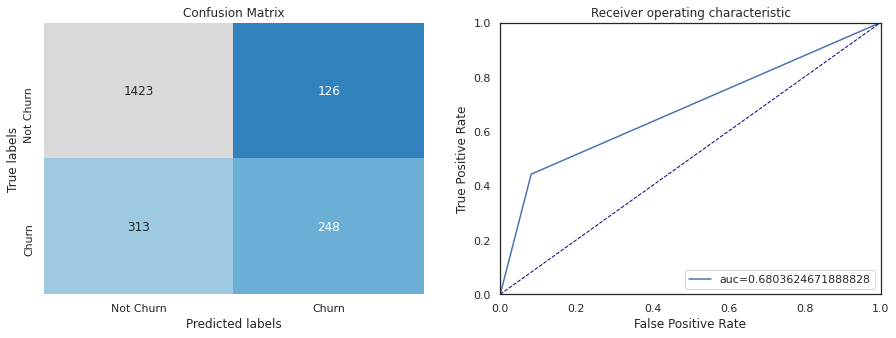

In [ ]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.62      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Area under ROC curve :  0.6829252153939808 



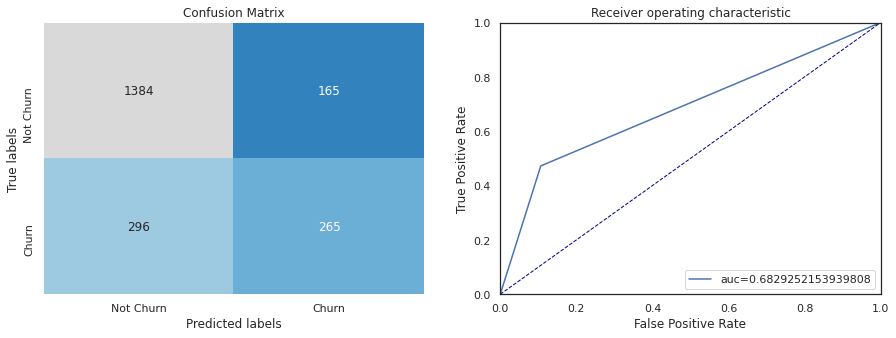

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7034870406875116 



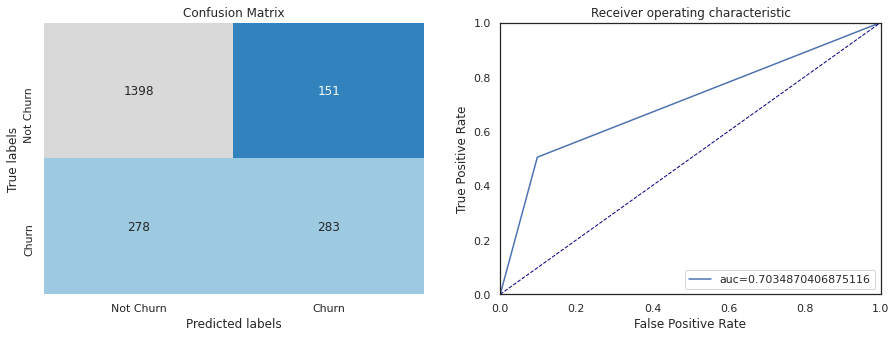

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

Aparentemente la Regresión Logística y XgBoost me está entregando mejores resultados de predicción del Churn, esto sin realizar ningún ajuste a los modelos.

**Calibración de parámetros**



Si durante la evaluación no obtuvimos buenas predicciones y nuestra precisión no es la mínima deseada es posible que tengamos problemas de overfitting (ó underfitting) y deberemos retornar al paso de entrenamiento haciendo antes una nueva configuración de parámetros de nuestro modelo. 

Podemos incrementar la cantidad de veces que iteramos nuestros datos de entrenamiento (EPOCHs). Otro parámetro importante es el conocido como «Learning Rate» (taza de aprendizaje) que suele ser un valor que multiplica al gradiente para acercarlo poco a poco al mínimo global (o local) para minimizar el coste de la función. No es lo mismo incrementar nuestros valores en 0,1 unidades que de 0,001 esto puede afectar significativamente el tiempo de ejecución del modelo. 

También se puede indicar el máximo error permitido de nuestro modelo. Podemos pasar de tardar unos minutos a horas (y días) en entrenar nuestra máquina. A estos parámetros muchas veces se les llama Hiperparámetros. 

Este «tuneo» sigue siendo más un arte que una ciencia y se ira mejorando a medida que experimentamos. 

In [ ]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

SVM_parameters = {
    "C":[1.0,2.0,3.0],
    "cache_size":[100,200],
    "decision_function_shape":['ovo','ovr'],
    "kernel":['sigmoid',"linear"],
    "tol":[0.001,0.0001]}

RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]
                     
                     }

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf,parameters,xTrain,Ytrain):
    
    
    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5)
    grid_fit = grid_obj.fit(xTrain,Ytrain)
    best_clf = grid_fit.best_estimator_

    return best_clf

Volvemos a entrenar nuestra data con los mismos algoritmos, ahora con el calibramiento de los parámetros:


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1549
           1       0.56      0.64      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.78      0.77      0.78      2110

Area under ROC curve :  0.7296605595697989 



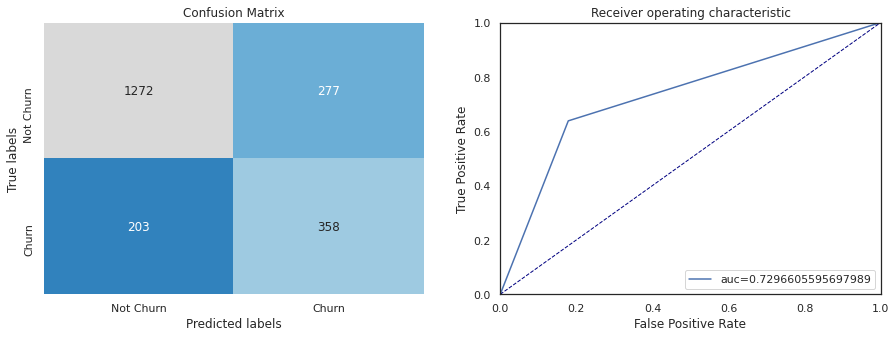

In [ ]:
tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train);
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7032413528824876 



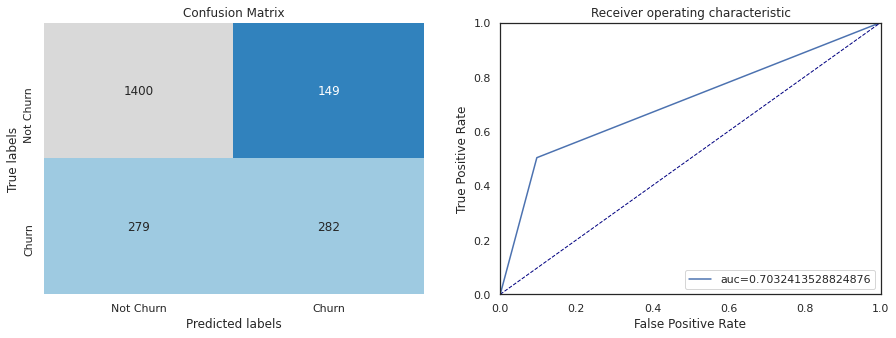

In [ ]:
logReg_grid = grid_search(logistic_reg,LogReg_parameters,X_train,y_train);
apply_classifier(logReg_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110

Area under ROC curve :  0.6909805532636202 



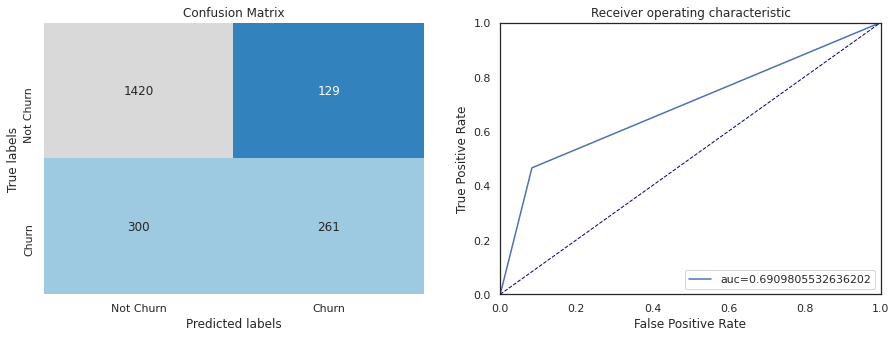

In [ ]:
svm_grid = grid_search(svm_model,SVM_parameters,X_train,y_train);
apply_classifier(svm_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.50      0.79      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110

Area under ROC curve :  0.7529577474513487 



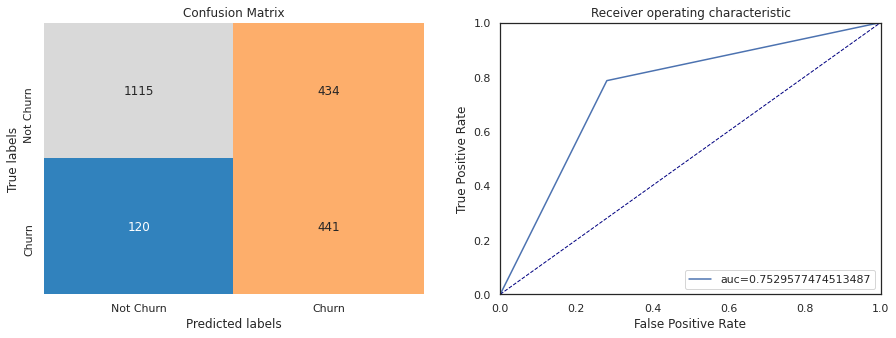

In [ ]:
randomForest_grid = grid_search(random_forest,RandomForest_parameters,X_train,y_train);
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.61      0.53      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.78      0.78      2110

Area under ROC curve :  0.70159346090687 



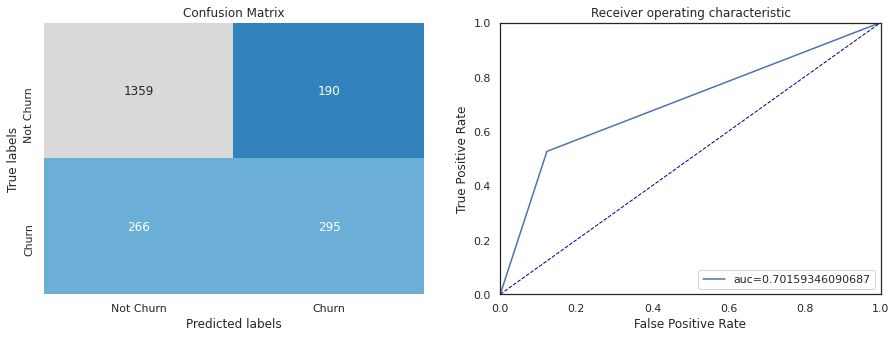

In [ ]:
xgBoost_grid = grid_search(xg_boost,Xgboost_parameters,X_train,y_train);
apply_classifier(xgBoost_grid,X_train, X_test, y_train, y_test)

Random Forest tiene un mejor nivel de ROC (75%) vemos claramente que nuestro nivel de ajuste del modelo mejoró respecto a la primera ejecución sin calibramiento de parámetros.

Volvemos a hacer la predicción del churn, ahora con un algoritmo llamado AdaBoost:


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1549
           1       0.51      0.81      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110

Area under ROC curve :  0.7628531546429241 



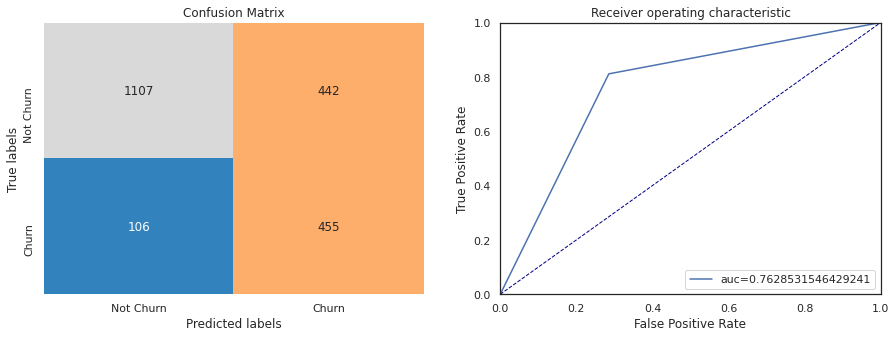

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(base_estimator = randomForest_grid, n_estimators = 4)
apply_classifier(model,X_train, X_test, y_train, y_test)

La predicción en términos de ROC sigue mejorando ahora es de 76%

**Balanceo de las clases de variable a predecir (Churn)**

Como vimos en los análisis descriptivos el % de clientes churn representaba alrededor de un 25% de la data total, lo que nos indica que existe una diferencia de alrededor del 50% con la cantidad de clientes que seguían siendo parte de la empresa, en términos de predicción es recomendable trata de crear muestras de datos que equiparen los % de distribución de ambas clases.

Hay varios métodos de muestreo que han sido diseñados para tratar datos desbalanceados, los cuales pueden ser agrupados en cuatro categorías: submuestreo, sobremuestreo, generación de datos sintéticos y aprendizaje sensible al costo. Todos estos métodos modifican la proporción de las clases y el tamaño del dataset original.

Los métodos de submuestreo eliminan observaciones de la clase mayoritaria con el fin de igualar los tamaños de las clases. 

In [ ]:
from sklearn.utils import resample

upsample_data = data_original

majority = upsample_data[upsample_data["Churn"]==0]
minority = upsample_data[upsample_data["Churn"]==1]

minority_upsampled = resample(minority, replace=True, n_samples=5163,random_state=42) 
del(upsample_data)
upsample_data = pd.concat([majority,minority_upsampled])

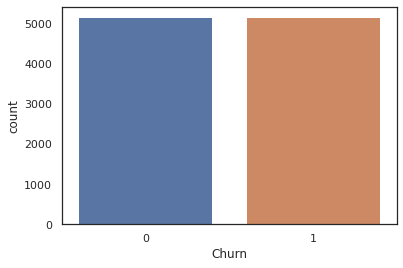

In [ ]:
sns.countplot(upsample_data["Churn"]);

In [ ]:
id_customer_upsample = upsample_data["customerID"]
label_upsample = upsample_data["Churn"]
upsample_data.drop("Churn",inplace = True, axis = 1)
upsample_data.drop("customerID",inplace = True, axis = 1)

Vuelvo a hacer una partición de mi nueva data en data de entrenamiento y de prueba (30%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train_upS.shape[0]))
print("Testing set has {} samples.".format(X_test_upS.shape[0]))

Training set has 7228 samples.
Testing set has 3098 samples.


Ahora ejecuto nuevamente todos mis algoritmos con la data balanceada:


 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1571
           1       0.82      0.93      0.87      1527

    accuracy                           0.87      3098
   macro avg       0.87      0.87      0.86      3098
weighted avg       0.87      0.87      0.86      3098

Area under ROC curve :  0.8663465638869541 



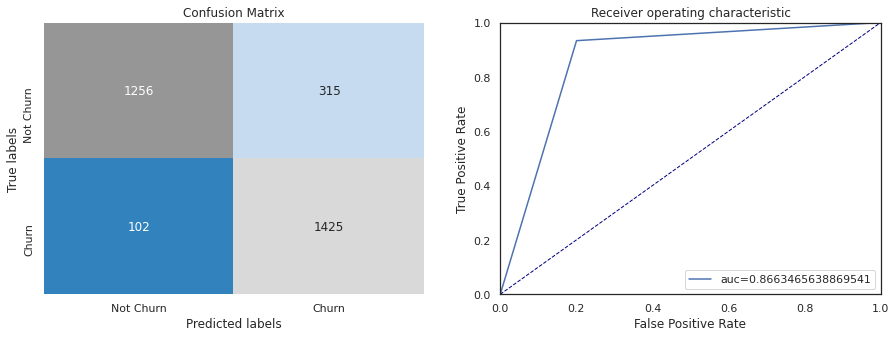

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1571
           1       0.74      0.81      0.78      1527

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098

Area under ROC curve :  0.7691693793490979 



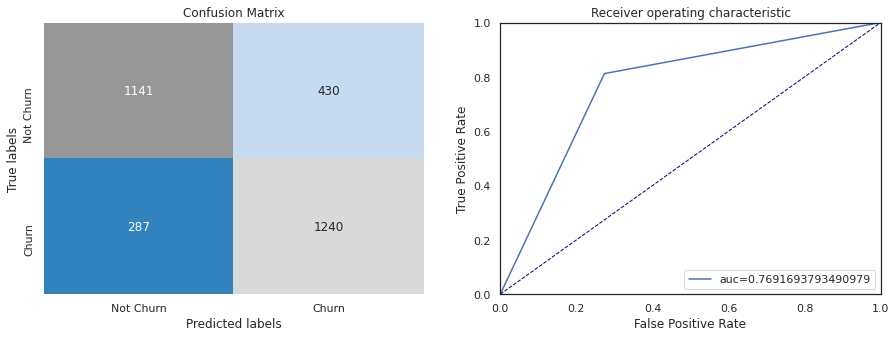

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1571
           1       0.76      0.84      0.80      1527

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098

Area under ROC curve :  0.7940612367997727 



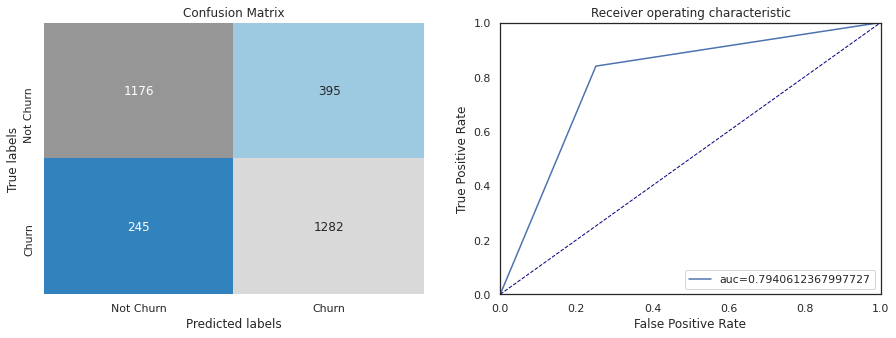

In [ ]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1571
           1       0.85      0.95      0.90      1527

    accuracy                           0.89      3098
   macro avg       0.90      0.89      0.89      3098
weighted avg       0.90      0.89      0.89      3098

Area under ROC curve :  0.8914191278814565 



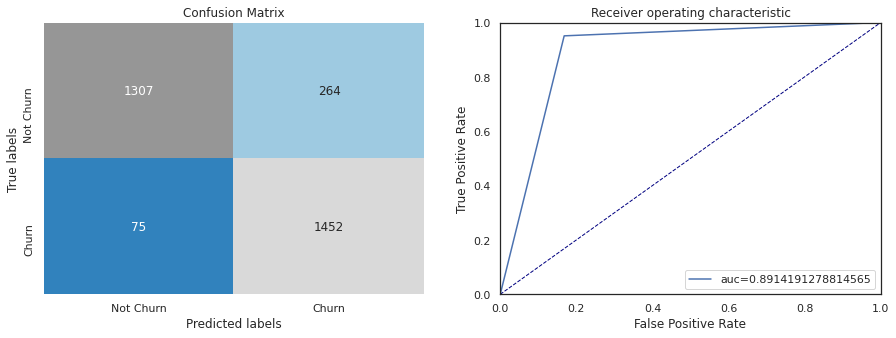

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1571
           1       0.76      0.82      0.79      1527

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098

Area under ROC curve :  0.7820560277825368 



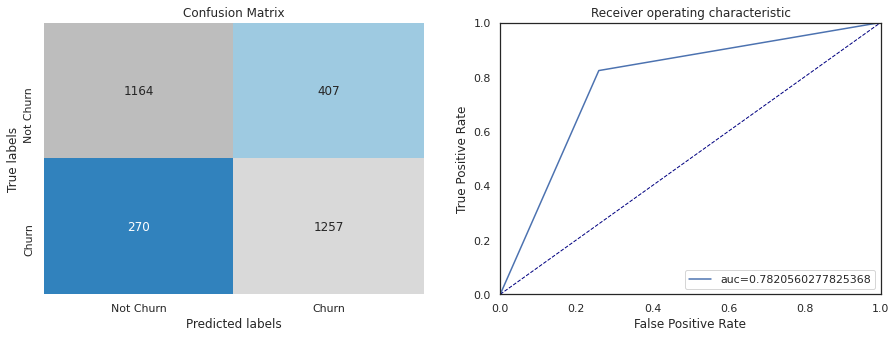

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

Vemos que todos los algoritmos utilizados aumentaron considerablemente sus niveles de precisión con el balanceo de datos.

**Modelo Final**

Probamos el algoritmo AdaBoost (que fue el que nos entregó mejores resultados en las experimentaciones iniciales) con la data balanceada.


 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      1571
           1       0.85      0.96      0.90      1527

    accuracy                           0.90      3098
   macro avg       0.90      0.90      0.90      3098
weighted avg       0.90      0.90      0.90      3098

Area under ROC curve :  0.8972121586532589 



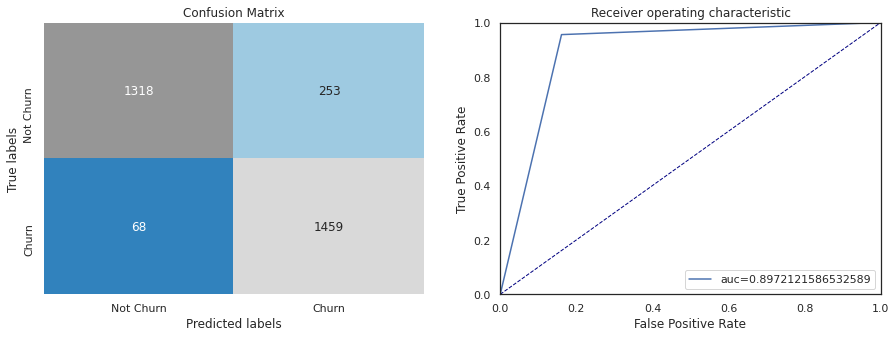

In [ ]:
model = AdaBoostClassifier(base_estimator = random_forest, n_estimators = 4)
apply_classifier(model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

Vemos que obtuve un modelo de predicción del churn de clientes con un AUC de 89% y con buena distribución de clasificación en la matriz de confusión.


Ahora vemos cuáles de todas las variables son las que me dieron mayor contribución en mi predicción del Churn con Adaboost.

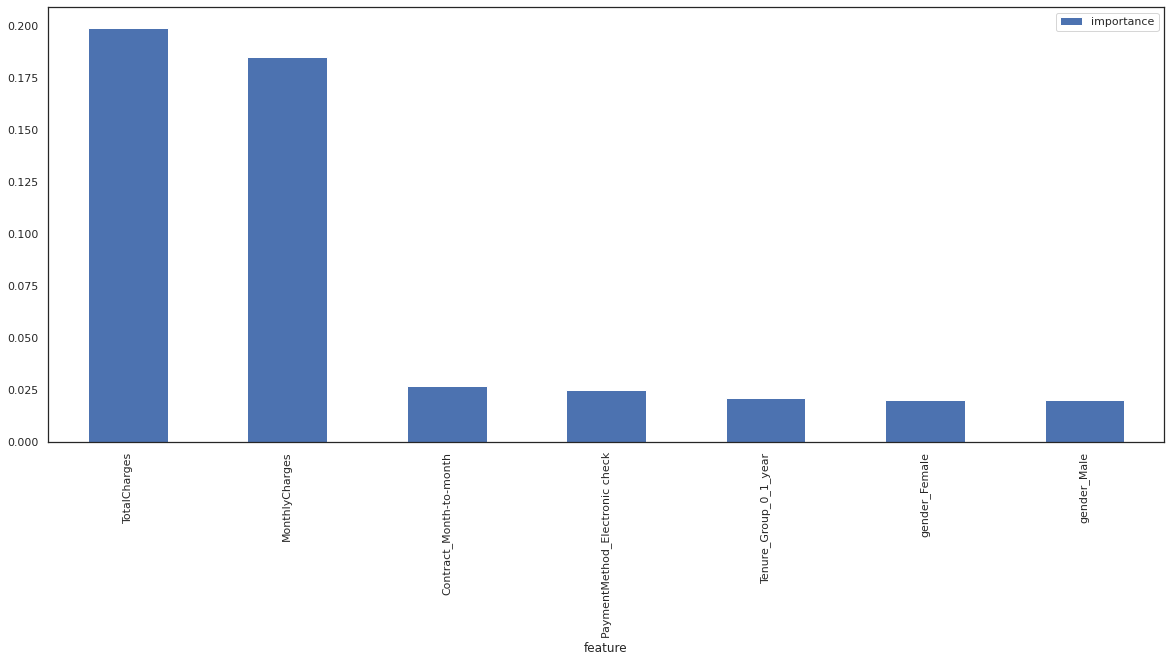

In [ ]:
importances = pd.DataFrame({'feature':data.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[0:7].plot.bar(figsize=(20, 8))

Vemos que el cargo total, cargo mensual, el método de pago electrónico, el género y la tenencia de productos menores de 1 año, son características que me pueden predecir de manera correcta cuáles de mis futuros clientes pueden ser churn.

Un insight importante que también puedo sacar de esta gráfica es que debo hacer mucho más esfuerzo de retención en los clientes nuevos.

La forma de aplicación del modelo es similar a lo que se trabaja con una regresión lineal, sólo que en vez de tener una ecuación, ahora tendré un objeto pkl sobre el cual deberá ejecutar mi modelo entrenado sobre todas estas características y qué me predecirán si un cliente puede o no puede ser churn.